In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.signal import find_peaks as fp
from scipy.optimize import curve_fit as cf
%matplotlib inline

In [26]:
data = np.loadtxt('binary_data.csv', delimiter=',')

In [27]:
data

array([[0.0000000e+00, 9.5248220e-05, 8.1479550e-05],
       [1.0010010e-02, 9.4175340e-05, 8.0585480e-05],
       [2.0020020e-02, 9.1850760e-05, 8.2135200e-05],
       ...,
       [9.9799795e+00, 1.3053417e-04, 5.3286552e-05],
       [9.9899900e+00, 1.2844801e-04, 5.4001808e-05],
       [1.0000000e+01, 1.2916327e-04, 5.3405760e-05]])

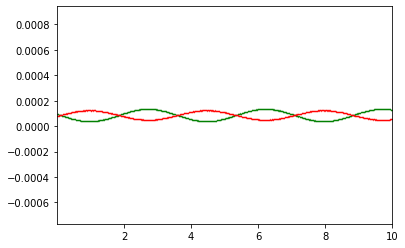

In [28]:
plt.xlim(np.min(data[:,1]),np.max(data[:,0]))
plt.scatter(data[:,0],data[:,1],s=0.1,c='g')
plt.scatter(data[:,0],data[:,2],s=0.1,c='r')
plt.show()

In [14]:
c = 3e5
vel1 = data[:,1]*c
vel2 = data[:,2]*c

In [15]:
zero_crossings = np.where(np.diff(np.sign(vel1-vel2)))[0]
print(zero_crossings)

[  7   8   9 183 357 358 359 532 707 883]


In [31]:
print((vel1)[zero_crossings])
print((vel1)[zero_crossings])
r_v = np.array([(vel1)[zero_crossings],(vel1)[zero_crossings]])

[26.768445  26.267766  26.285649  25.838613  26.375055  25.999545
 26.249886  25.945902  26.6611575 26.214123 ]
[26.768445  26.267766  26.285649  25.838613  26.375055  25.999545
 26.249886  25.945902  26.6611575 26.214123 ]


In [32]:
Radial_Velocity = np.mean(r_v)

In [33]:
print(Radial_Velocity)

26.26061415


In [34]:
vel1 = vel1 - Radial_Velocity
vel2 = vel2 - Radial_Velocity

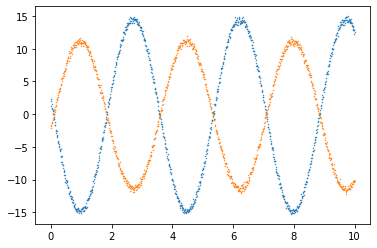

In [35]:
plt.scatter(data[:,0],vel1,s=0.2)
plt.scatter(data[:,0],vel2,s=0.2)

In [36]:
def sine(x,V,f):
    return -1*V*np.sin(2*np.pi*f*x)

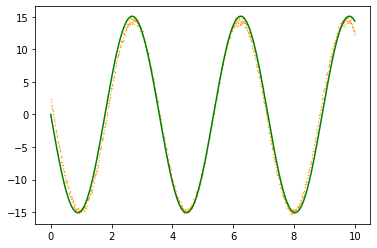

In [42]:
p_opt , _ = cf(sine,data[:,0],vel1)
p_opt = np.array([v1,f1])
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel1,s=0.1,color='darkorange')

In [37]:
frequency, power = LombScargle(data[:,0], vel1).autopower(minimum_frequency = 0.1,maximum_frequency = 2)

In [38]:
print(power)

[4.70917606e-03 3.12622003e-02 5.86018228e-02 4.35742206e-02
 7.96492885e-03 2.33174982e-02 1.87853274e-01 5.01240592e-01
 8.16226032e-01 9.89612990e-01 9.37051604e-01 6.68119956e-01
 3.25476248e-01 8.82429110e-02 3.94233520e-03 1.66595165e-02
 4.30610236e-02 3.88350656e-02 1.58281000e-02 1.51964635e-03
 5.11416771e-03 1.38616088e-02 1.39494549e-02 6.51308835e-03
 9.93005316e-04 2.46827208e-03 6.52595972e-03 6.86265236e-03
 3.45406200e-03 7.67435061e-04 1.71017832e-03 4.09930500e-03
 4.36618662e-03 2.34133215e-03 6.44145309e-04 1.20063112e-03
 2.76111339e-03 3.00483165e-03 1.69150874e-03 5.09985885e-04
 8.42842347e-04 1.93087682e-03 2.16358546e-03 1.28540747e-03
 4.50354656e-04 6.96714877e-04 1.52686372e-03 1.74341454e-03
 1.08499587e-03 3.79110058e-04 4.61512190e-04 1.04676190e-03
 1.25518516e-03 8.32865791e-04 3.49054611e-04 4.28698215e-04
 8.72096815e-04 1.02300202e-03 6.92983055e-04 3.26578735e-04
 4.11374716e-04 7.76673478e-04 8.84516347e-04 5.84045014e-04
 2.55434392e-04 3.196895

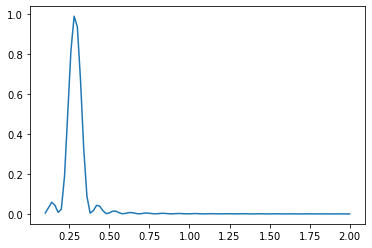

In [39]:
plt.plot(frequency,power)

In [40]:
f1 = frequency[np.where(power==np.max(power))]

[1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86
 1.88 1.9  1.92 1.94 1.96 1.98 2.  ]


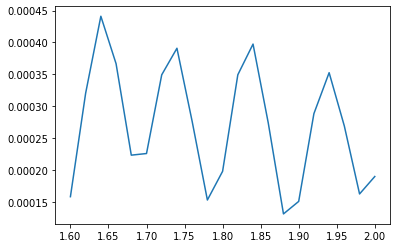

In [124]:
frequency2, power2 = LombScargle(data[:,0], vel2).autopower(minimum_frequency = 1.6,maximum_frequency = 2)
print(frequency2)
plt.plot(frequency2,power2)

In [125]:
frequency2[np.where(power2==np.max(power2))]

array([1.64])

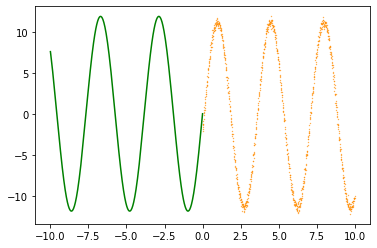

In [132]:
p_opt = np.array([np.max(vel2),1.64])
plt.plot(-data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel2,s=0.1,color='darkorange')

In [191]:
indices = fp(np.abs(vel1),height=15)
print(vel1[indices[0]])

[-15.12050595 -15.04898055 -15.10262415 -15.03109905 -15.04898055
 -15.01321815 -15.26355705 -15.10262415 -15.15626895 -15.10262415]


In [193]:
h = np.mean(np.abs(vel1[indices[0]]))

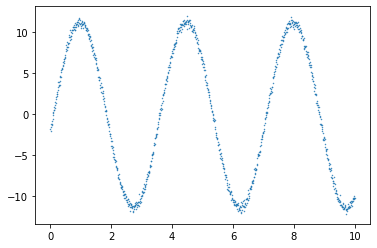

In [205]:
plt.scatter(data[:,0],vel2,s=0.2)

In [190]:
np.max(np.abs(vel1))

15.26355705

In [212]:
indices2 = fp(np.abs(vel2),height=12)
v2 = np.mean(np.abs(vel2[indices2[0]]))
print(v2)

12.152194649999998


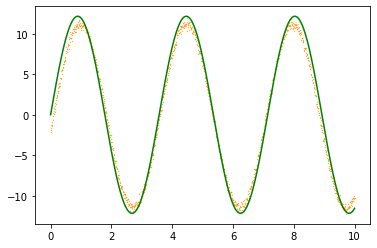

In [213]:
p_opt = np.array([-v2,1.76])
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel2,s=0.1,color='darkorange')

Period of revolution is: 3.571428571428571 years
Mass of lighter star is: 7.686050709878983e+22 kg
Period of revolution is: 9.549884116950885e+22 years


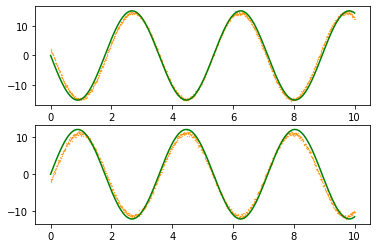

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.signal import find_peaks as fp

data = np.loadtxt('binary_data.csv', delimiter=',')
c = 3e5
vel1 = data[:,1]*c
vel2 = data[:,2]*c
zero_crossings = np.where(np.diff(np.sign(vel1-vel2)))[0]
r_v = np.array([(vel1)[zero_crossings],(vel1)[zero_crossings]])
Radial_Velocity = np.mean(r_v)
vel1 = vel1 - Radial_Velocity
vel2 = vel2 - Radial_Velocity

frequency, power = LombScargle(data[:,0], vel1).autopower(minimum_frequency = 0.1,maximum_frequency = 2)
f_opt = frequency[np.where(power==np.max(power))]

def sine(x,V,f):
    return V*np.sin(2*np.pi*f*x)

indices1 = fp(np.abs(vel1),height=15)
v1 = np.mean(np.abs(vel1[indices1[0]]))

indices2 = fp(np.abs(vel2),height=12)
v2 = np.mean(np.abs(vel2[indices2[0]]))

p_opt = np.array([-v1,f_opt])
plt.subplot(2, 1, 1)
plt.title('Star 1')
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel1,s=0.1,color='darkorange')

p_opt = np.array([v2,f_opt])
plt.subplot(2, 1, 2)
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel2,s=0.1,color='darkorange')



G = 6.674e-11
T = 1/f_opt

v1 = v1*10**3
v2 = v2*10**3

M1 = (v2*(v1+v2)**2)*T/(2*np.pi*G)
M2 = (v1*(v1+v2)**2)*T/(2*np.pi*G)

print("Period of revolution is: {} years".format(T[0]))
print("Mass of lighter star is: {} kg".format(M1[0]))
print("Period of revolution is: {} years".format(M2[0]))

In [4]:
print(M1)
print(M2)

[1.23683575e+13]
[1.53676296e+13]


In [2]:
print("Period of revolution is: {} years".format(T[0]))


Period of revolution is: 3.571428571428571 years


Period of revolution is: 3.571428571428571 years
Mass of lighter star is: 2.4255331388207697e+30 kg
Period of revolution is: 3.013714230090893e+30 kg


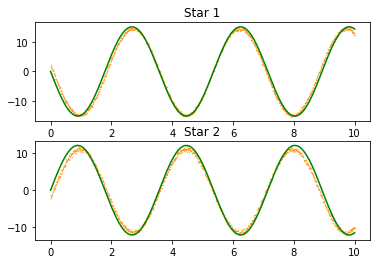

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle, BoxLeastSquares
from scipy.signal import find_peaks as fp
from astropy import units as u

data = np.loadtxt('binary_data.csv', delimiter=',')
c = 3e5
vel1 = data[:,1]*c
vel2 = data[:,2]*c
zero_crossings = np.where(np.diff(np.sign(vel1-vel2)))[0]
r_v = np.array([(vel1)[zero_crossings],(vel1)[zero_crossings]])
Radial_Velocity = np.mean(r_v)
vel1 = vel1 - Radial_Velocity
vel2 = vel2 - Radial_Velocity

frequency, power = LombScargle(data[:,0], vel1).autopower(minimum_frequency = 0.1,maximum_frequency = 2)
f_opt = frequency[np.where(power==np.max(power))]

def sine(x,V,f):
    return V*np.sin(2*np.pi*f*x)

indices1 = fp(np.abs(vel1),height=15)
v1 = np.mean(np.abs(vel1[indices1[0]]))

indices2 = fp(np.abs(vel2),height=12)
v2 = np.mean(np.abs(vel2[indices2[0]]))

p_opt = np.array([-v1,f_opt])
plt.subplot(2, 1, 1)
plt.title('Star 1')
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel1,s=0.1,color='darkorange')

p_opt = np.array([v2,f_opt])
plt.subplot(2, 1, 2)
plt.title('Star 2')
plt.plot(data[:,0],sine(data[:,0],*p_opt),label='Best Fit',color='g')
plt.scatter(data[:,0],vel2,s=0.1,color='darkorange')

G = 6.674e-11
T = (1/f_opt)*u.year

T_sec = T.to(u.second)

v1 = v1*10**3
v2 = v2*10**3

M1 = (v2*(v1+v2)**2)*T_sec.value/(2*np.pi*G)
M2 = (v1*(v1+v2)**2)*T_sec.value/(2*np.pi*G)

print("Period of revolution is: {} years".format(T[0].value))
print("Mass of lighter star is: {} kg".format(M1[0]))
print("Period of revolution is: {} kg".format(M2[0]))
